In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline


#import data
df = pd.read_csv('train.csv', sep=',')


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

## Data Review
In the below code, we do a quick review to asses the data and understand what variables may need treatment

In [11]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, cabin, and embarked are missing some data

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

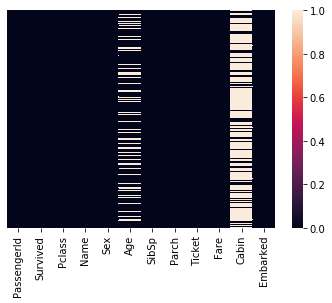

In [32]:
sns.heatmap(df.isnull(),yticklabels=False);

In [38]:
sum(df.duplicated())

0

In [39]:
#Drop Cabin column as it has lots of null values
df.drop('Cabin', axis=1, inplace=True)


In [40]:
#Drop rows that have null age
df.dropna(inplace=True)

In [42]:
#checking df after cleaning up, looks good!
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Exploration
In this section we  review the cleaned dataframe to see the base survival rate and determine what variables may be of interest

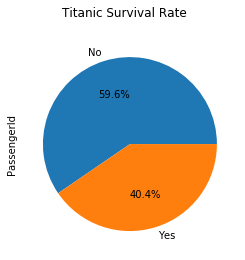

In [44]:
labelsBase = ['No','Yes']
dfBase = df.groupby('Survived')['PassengerId'].count()
dfBase.T.divide(dfBase.T.sum()).plot.pie(subplots = True, title = 'Titanic Survival Rate', autopct= '%1.1f%%', labels=labelsBase);

### Survival by Sex

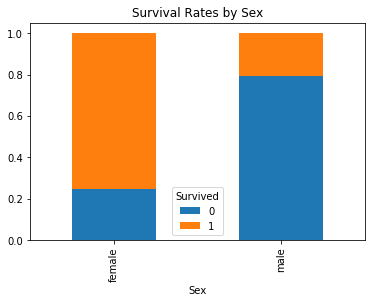

In [45]:
dfSex = df.groupby(['Sex','Survived'])['PassengerId'].count().unstack()
dfSex.T.divide(dfSex.T.sum()).T.plot(kind='bar',stacked=True, title='Survival Rates by Sex');

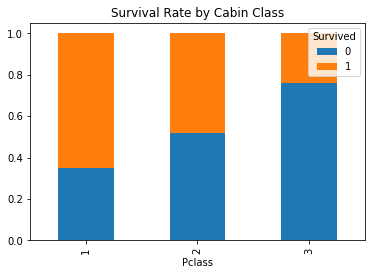

In [49]:
dfClass = df.groupby(['Pclass','Survived'])['PassengerId'].count().unstack()
dfClass.T.divide(dfClass.T.sum()).T.plot(kind='bar', stacked=True, title = 'Survival Rate by Cabin Class');

Splitting the data by sex or class appears to have a large impact on survival rates. In the below section we review both sex and calss to note if the to variables are correlated (ie Is first class made up of mainly women and is that why we see a higher survival rate?)

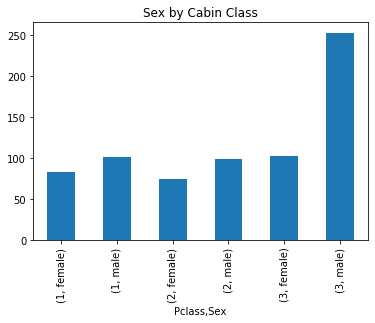

In [56]:
df.groupby(['Pclass','Sex'])['PassengerId'].count().plot(kind='bar',title='Sex by Cabin Class')

### Survival by Age

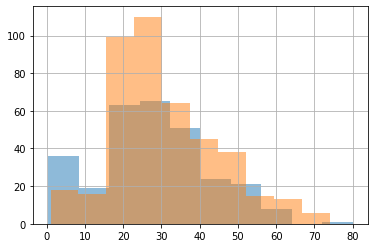

In [64]:
df.query('Survived ==1')['Age'].hist(alpha = .5);
df.query('Survived ==0')['Age'].hist(alpha = .5);

## Train Model


### Setup data

In [78]:
dfAnalysis = df.drop(['Ticket','Embarked','Name','PassengerId','Fare'], axis=1)
sex = pd.get_dummies(dfAnalysis['Sex'],drop_first=True)
dfAnalysis = pd.concat([dfAnalysis,sex],axis=1)
dfAnalysis.drop('Sex',axis=1,inplace=True)



Survived  Pclass   Age  SibSp  Parch  male
0           0       3  22.0      1      0     1
1           1       1  38.0      1      0     0
2           1       3  26.0      0      0     0
3           1       1  35.0      1      0     0
4           0       3  35.0      0      0     1
..        ...     ...   ...    ...    ...   ...
885         0       3  39.0      0      5     0
886         0       2  27.0      0      0     1
887         1       1  19.0      0      0     0
889         1       1  26.0      0      0     1
890         0       3  32.0      0      0     1

[712 rows x 6 columns]

In [79]:
#Train Data
x = dfAnalysis.drop('Survived', axis=1)
y = dfAnalysis['Survived']

In [83]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=100)

In [86]:
from sklearn.linear_model import LogisticRegression

In [93]:
logModel = LogisticRegression(solver='lbfgs')

In [94]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [95]:
logPred = logModel.predict(X_test)

### Assess Model Accuracy

In [101]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [97]:
classification_report(y_test, logPred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.84       124\n           1       0.80      0.73      0.77        90\n\n    accuracy                           0.81       214\n   macro avg       0.81      0.80      0.81       214\nweighted avg       0.81      0.81      0.81       214\n'

In [99]:
#Confusion matrix
confusion_matrix(y_test, logPred)

array([[108,  16],
       [ 24,  66]], dtype=int64)

In [102]:
accuracy_score(y_test,logPred)

0.8130841121495327